# **Project Title :**

# A Supervised Approach to Credit Card Fraud Detection Using Regression and Classification ML Models


# **Introduction**

It is important that credit card companies can recognize fraudulent credit 
card transactions so that customers are not charged for items that they 
did not purchase.
The Credit Card Fraud Detection Problem includes modelling past credit card 
transactions with the knowledge of the ones that turned out to be fraud. This 
model is then used to identify whether a new transaction is fraudulent or not. **Our aim here is to detect 100% of the fraudulent transactions while minimizing 
the incorrect fraud classifications.**

## **Data Description**

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from **April 2005** to **September 2005.**


### **Attribute Information:**

There are 25 variables:

*   ID: ID of each client
*   LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

*   SEX: Gender (1=male, 2=female)
*   EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

*   MARRIAGE: Marital status (1=married, 2=single, 3=others)
*   AGE: Age in years

*   PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)

*   PAY_2: Repayment status in August, 2005 (scale same as above)

*   PAY_3: Repayment status in July, 2005 (scale same as above)
*   PAY_4: Repayment status in June, 2005 (scale same as above)


*   PAY_5: Repayment status in May, 2005 (scale same as above)


*   PAY_6: Repayment status in April, 2005 (scale same as above)




*   BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)



*   BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
*   BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

*   BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
*   BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)


*   BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

*   PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

*   PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
*   PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)


*   PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)


*   PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

*   PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
*   default.payment.next.month: Default payment (1=yes, 0=no)

## **Objective:**

The notebook is structured as follows:

*   First exploration: just to see what we have.  
*   Cleaning: time to make choices about undocumented labels
*   Feature engineering: time to be creative
*   Final result and lessons learned

In [ ]:
# import basic libraries
import pandas as pd
pd.set_option("display.max_columns", 100)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Load the data

df = pd.read_csv("/content/default-of-credit-card-clients.csv")
nRow, nCol = df.shape
print(f'There are {nRow} row and {nCol} columns')

There are 30000 row and 25 columns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df.describe()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
print("Shape of the Dataset : {}".format(df.shape))
print("Number of Columns in the Dataset : {}".format(df.shape[1]))
print("Number of Rows in the Dataset : {}".format(df.shape[0]))
print("-"*40)

Shape of the Dataset : (30000, 25)
Number of Columns in the Dataset : 25
Number of Rows in the Dataset : 30000
----------------------------------------


In [ ]:
numeric_features = df.select_dtypes(include = [np.number])
categoric_features = df.select_dtypes(exclude = [np.number])
print("Number of Numerical Features : {}".format(numeric_features.shape[1]))
print("Number of Categorical Features : {}".format(categoric_features.shape[1]))
print("-"*40)

Number of Numerical Features : 25
Number of Categorical Features : 0
----------------------------------------


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [ ]:
df.isnull().sum().max()

0

In [ ]:
print("No Fraud", round(df['default payment next month'].value_counts()[0]/len(df) * 100,2), "% of the dataset")
print("Fraud", round(df['default payment next month'].value_counts()[1]/len(df) * 100,2), "% of the dataset")

No Fraud 77.88 % of the dataset
Fraud 22.12 % of the dataset


# **Exploratory Data Analysis**

In [ ]:
# renaming column for our convinience
df.rename(columns = {'default payment next month': 'Isfraud'}, inplace = True)
df.rename(columns = {'PAY_0': 'PAY_1'}, inplace = True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Isfraud
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
nRow, nCol = df.shape
print(f'There are {nRow} and {nCol} columns')

There are 30000 and 25 columns


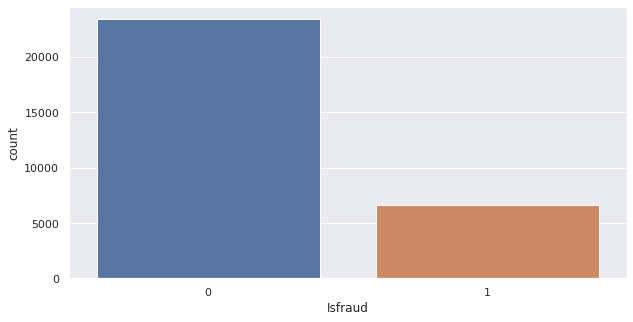

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'Isfraud', data = df)

In [ ]:
df['Isfraud'].value_counts()

0    23364
1     6636
Name: Isfraud, dtype: int64

Isfraud as pie chart:
Fraud: 6636
No Fraud: 23364


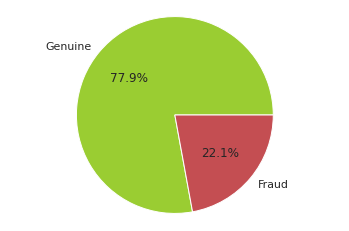

In [ ]:
# Check Class variables that has 0 value for Genuine transactions and 1 for Fraud
print("Isfraud as pie chart:")
fig, ax = plt.subplots(1, 1)
ax.pie(df.Isfraud.value_counts(),autopct='%1.1f%%', labels=['Genuine','Fraud'], colors=['yellowgreen','r'])
plt.axis('equal')
plt.ylabel('')

print("Fraud:", df['Isfraud'].value_counts()[1])
print("No Fraud:", df['Isfraud'].value_counts()[0])

## Categorical Variable

In [ ]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [ ]:
df['EDUCATION'].value_counts()
#EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [ ]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

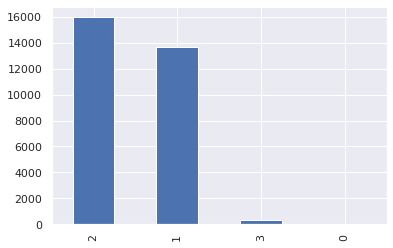

In [ ]:
df['MARRIAGE'].value_counts().plot(kind = 'bar')
#MARRIAGE: Marital status (1=married, 2=single, 3=others)


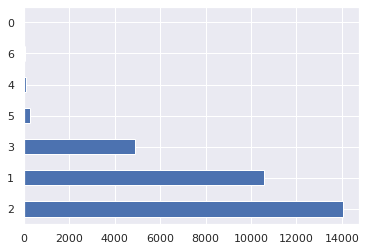

In [ ]:
df['EDUCATION'].value_counts().plot(kind = 'barh')

## Numerical variable

In [ ]:
def plot_histograms(df, variables, n_rows, n_cols, n_bins):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=n_bins,ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

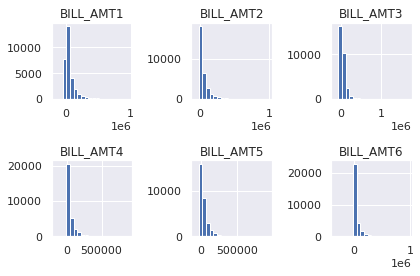

In [ ]:
bills = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]

plot_histograms(bills, bills.columns, 2, 3, 20)

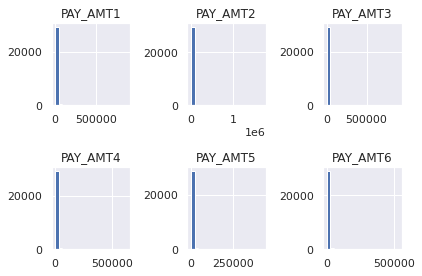

In [ ]:
paid = df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]

plot_histograms(paid, paid.columns, 2, 3, 20)

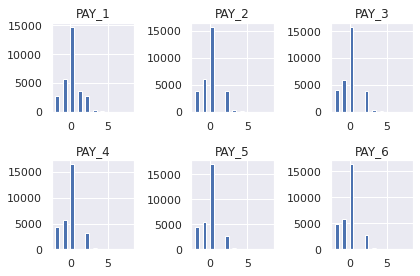

In [ ]:
late = df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]

plot_histograms(late, late.columns, 2, 3, 20)

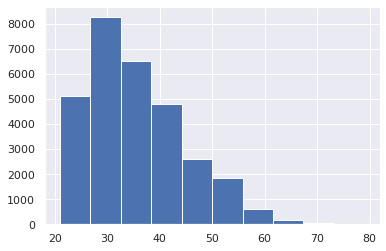

In [ ]:
df.AGE.hist()

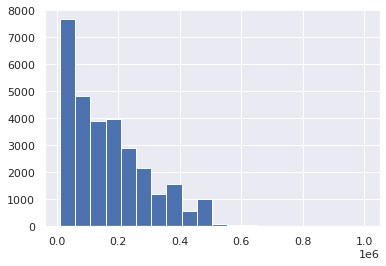

In [ ]:
df.LIMIT_BAL.hist(bins = 20)

# **Data Cleaning**

> Indented block



In [ ]:
fil = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)
df.loc[fil, 'EDUCATION'] = 4
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [ ]:
df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3
df.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

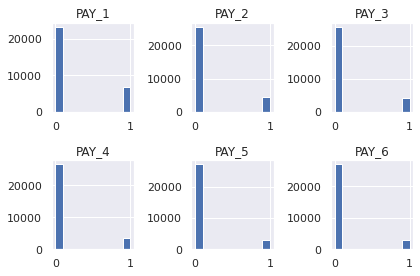

In [ ]:
fil = (df.PAY_1 == -2) | (df.PAY_1 == -1) | (df.PAY_1 == 0)
df.loc[fil, 'PAY_1'] = 0
fil = (df.PAY_2 == -2) | (df.PAY_2 == -1) | (df.PAY_2 == 0)
df.loc[fil, 'PAY_2'] = 0
fil = (df.PAY_3 == -2) | (df.PAY_3 == -1) | (df.PAY_3 == 0)
df.loc[fil, 'PAY_3'] = 0
fil = (df.PAY_4 == -2) | (df.PAY_4 == -1) | (df.PAY_4 == 0)
df.loc[fil, 'PAY_4'] = 0
fil = (df.PAY_5 == -2) | (df.PAY_5 == -1) | (df.PAY_5 == 0)
df.loc[fil, 'PAY_5'] = 0
fil = (df.PAY_6 == -2) | (df.PAY_6 == -1) | (df.PAY_6 == 0)
df.loc[fil, 'PAY_6'] = 0
late = df[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
plot_histograms(late, late.columns, 2, 3, 10)

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Isfraud,SE_MA,AgeBin,SE_AG,Client_6,Client_5,Client_4,Client_3,Client_2,Client_1,Avg_exp_5,Avg_exp_4,Avg_exp_3,Avg_exp_2,Avg_exp_1,Closeness_6,Closeness_5,Closeness_4,Closeness_3,Closeness_2,Closeness_1
0,1,20000,2,2,1,24,1,1,0,0,0,0,3913,3102,689,0,0,0,0,689,0,0,0,0,1,4,1,6,0,0,0,1,1,1,0.000000,0.000000,0.011483,0.047387,0.046020,1.000000,1.000000,1.000000,0.965550,0.844900,0.804350
1,2,120000,2,2,2,26,0,1,0,0,0,1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,5,1,6,1,1,1,1,1,1,0.001617,0.004213,0.003947,0.003050,0.004035,0.972825,0.971208,0.972733,0.977650,0.985625,0.977650
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,5,2,7,1,1,1,1,1,1,0.004433,0.004344,0.003741,0.008272,0.043796,0.827233,0.833911,0.840767,0.849344,0.844144,0.675122
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,4,2,7,1,1,1,1,1,1,0.009620,0.009360,0.154087,0.120370,0.099324,0.409060,0.420820,0.433720,0.014180,0.035340,0.060200
4,5,50000,1,2,1,57,0,0,0,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,1,4,4,1,1,1,1,1,1,0.014080,0.114980,0.242620,0.214545,0.191424,0.617380,0.617080,0.581200,0.283300,0.886600,0.827660


In [ ]:
df[df.PAY_AMT1 > 300000][['LIMIT_BAL', 'PAY_1', 'PAY_2', 'BILL_AMT2', 
                          'PAY_AMT1', 'BILL_AMT1', 'Isfraud']]
# doesn't look weird after all

,LIMIT_BAL,PAY_1,PAY_2,BILL_AMT2,PAY_AMT1,BILL_AMT1,Isfraud
2687,500000,0,0,367979,368199,71921,0
5687,480000,0,0,400000,302000,106660,0
8500,400000,0,0,405016,405016,6500,0
12330,300000,1,0,324392,505000,-165580,0
25431,170000,0,0,167941,304815,30860,0
28003,510000,0,0,481382,493358,71121,0
28716,340000,0,0,176743,873552,139808,0
29820,400000,1,0,394858,423903,396343,0
29867,340000,0,0,331641,300039,44855,0
29963,610000,0,0,322228,323014,348392,0


In [ ]:
df[df.PAY_AMT2 > 300000][['LIMIT_BAL', 'PAY_2', 'PAY_3', 'BILL_AMT3', 
                          'PAY_AMT2', 'BILL_AMT2', 'Isfraud']]

,LIMIT_BAL,PAY_2,PAY_3,BILL_AMT3,PAY_AMT2,BILL_AMT2,Isfraud
2592,480000,0,0,339176,344261,38929,0
3774,500000,0,0,301441,302961,39356,0
5296,500000,0,0,1664089,1684259,-18088,0
5400,500000,0,0,385228,385228,8970,0
6150,300000,0,0,4735,344467,-5973,1
6864,500000,0,0,444462,300018,201402,0
9044,500000,0,0,384973,384986,24201,0
11568,430000,0,0,354716,358689,960,1
11853,360000,1,0,338600,361560,-22960,0
12829,340000,0,0,330510,312723,335584,1


## Further Analysis

In [ ]:
#Further Analysis
df.groupby(['SEX', 'Isfraud']).size()

SEX  Isfraud
1    0           9015
     1           2873
2    0          14349
     1           3763
dtype: int64

In [ ]:
gender = df.groupby(['SEX', 'Isfraud']).size().unstack(1)
# 1 is the default for unstack, but I put it to show explicitly what we are unstacking
gender


Isfraud,0,1
SEX,,
1,9015,2873
2,14349,3763


In [ ]:
# Another, easier, way is to just use crosstab
pd.crosstab(df.SEX, df.Isfraud)

Isfraud,0,1
SEX,,
1,9015,2873
2,14349,3763


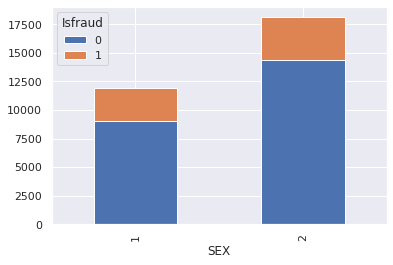

In [ ]:
gender.plot(kind='bar', stacked = True)

In [ ]:
gender['perc'] = (gender[1]/(gender[0] + gender[1])) 
#this creates a new column in our dataset
gender

Isfraud,0,1,perc
SEX,,,
1,9015,2873,0.241672
2,14349,3763,0.207763


In [ ]:
def corr_2_cols(Col1, Col2):
    res = df.groupby([Col1, Col2]).size().unstack()
    res['perc'] = (res[res.columns[1]]/(res[res.columns[0]] + res[res.columns[1]]))
    return res

In [ ]:
corr_2_cols('EDUCATION', 'Isfraud')

Isfraud,0,1,perc
EDUCATION,,,
1,8549,2036,0.192348
2,10700,3330,0.237349
3,3680,1237,0.251576
4,435,33,0.070513


In [ ]:
corr_2_cols('MARRIAGE', 'Isfraud')

Isfraud,0,1,perc
MARRIAGE,,,
1,10453,3206,0.234717
2,12623,3341,0.209283
3,288,89,0.236074


In [ ]:
corr_2_cols('MARRIAGE', 'SEX')

SEX,1,2,perc
MARRIAGE,,,
1,5190,8469,0.620031
2,6553,9411,0.589514
3,145,232,0.615385


In [ ]:
corr_2_cols('EDUCATION', 'SEX')

SEX,1,2,perc
EDUCATION,,,
1,4354,6231,0.588663
2,5374,8656,0.616964
3,1990,2927,0.595282
4,170,298,0.636752




*   now we will check if the past six months bill amount will affect the payment default next month or not:



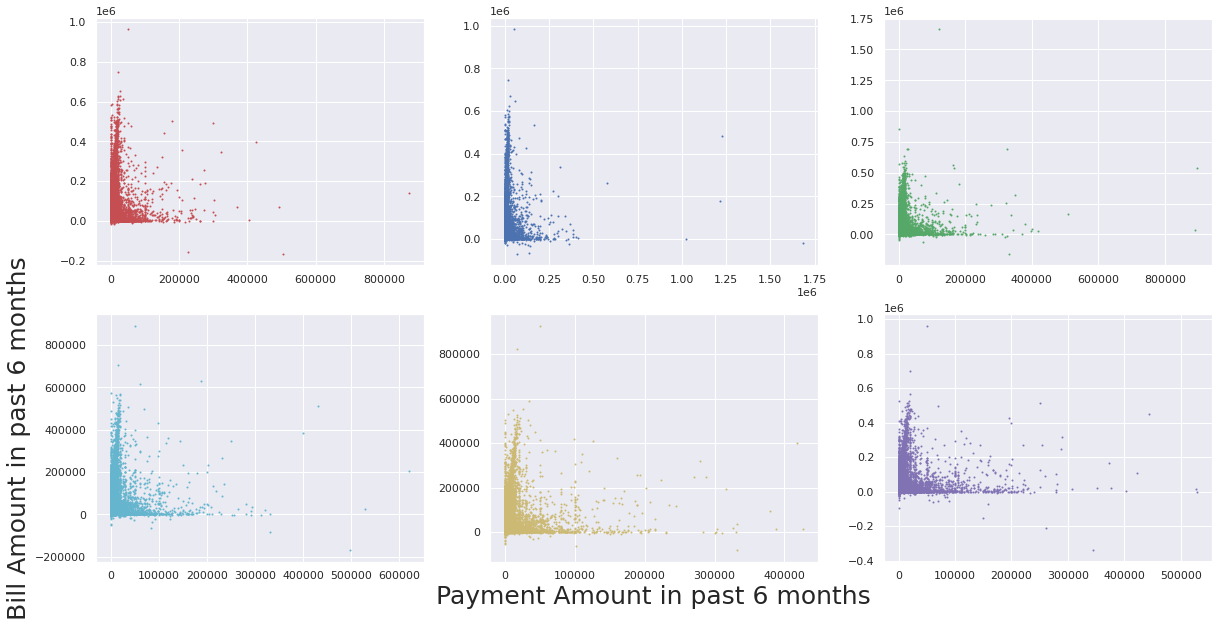

In [ ]:
plt.subplots(figsize=(20,10))

plt.subplot(231)
plt.scatter(x=df.PAY_AMT1, y=df.BILL_AMT1, c='r', s=1)

plt.subplot(232)
plt.scatter(x=df.PAY_AMT2, y=df.BILL_AMT2, c='b', s=1)

plt.subplot(233)
plt.scatter(x=df.PAY_AMT3, y=df.BILL_AMT3, c='g', s=1)

plt.subplot(234)
plt.scatter(x=df.PAY_AMT4, y=df.BILL_AMT4, c='c', s=1)
plt.ylabel("Bill Amount in past 6 months", fontsize=25)

plt.subplot(235)
plt.scatter(x=df.PAY_AMT5, y=df.BILL_AMT5, c='y', s=1)
plt.xlabel("Payment Amount in past 6 months", fontsize=25)

plt.subplot(236)
plt.scatter(x=df.PAY_AMT6, y=df.BILL_AMT6, c='m', s=1)

plt.show()


In [ ]:
df[['PAY_AMT6', 'BILL_AMT6', 'PAY_AMT5', 
     'BILL_AMT5', 'PAY_AMT4', 'BILL_AMT4', 'PAY_AMT3', 'BILL_AMT3', 
     'PAY_AMT2', 'BILL_AMT2',
     'PAY_AMT1', 'BILL_AMT1',
     'LIMIT_BAL', 'Isfraud']].sample(25)

,PAY_AMT6,BILL_AMT6,PAY_AMT5,BILL_AMT5,PAY_AMT4,BILL_AMT4,PAY_AMT3,BILL_AMT3,PAY_AMT2,BILL_AMT2,PAY_AMT1,BILL_AMT1,LIMIT_BAL,Isfraud
21712,2707,69097,5000,65334,5000,62001,5000,58602,5000,54489,5000,50346,110000,0
9451,0,17688,1400,16563,0,16977,1000,16545,2000,15105,0,15641,50000,1
13573,0,22449,0,23030,20000,11642,20000,7681,7681,892,892,596,220000,0
454,1700,48443,1800,48919,1800,49340,1800,78553,51432,28202,2500,78129,80000,0
20963,3699,101545,3606,100845,3512,128646,0,132549,5000,131094,6500,128190,130000,0
28917,17120,540,540,3617,3617,1040,1040,4952,4952,1213,1213,14391,150000,0
2645,308,18745,5000,16260,545,18649,14000,44792,3000,45974,2043,48152,50000,0
2622,4000,71738,0,73062,9100,65056,2400,63714,3000,61743,3000,59712,100000,0
18137,1600,46495,1800,45576,2000,44607,3000,42604,5000,38219,5000,34139,100000,0
24298,2000,17664,3000,14903,2000,13138,2000,11647,0,12127,3000,9608,40000,0


In [ ]:
df[df.Isfraud == 1][['BILL_AMT2',
     'PAY_AMT1', 'BILL_AMT1', 'PAY_1',
     'LIMIT_BAL']].sample(30)

,BILL_AMT2,PAY_AMT1,BILL_AMT1,PAY_1,LIMIT_BAL
23759,845,0,845,0,140000
19982,5000,0,5000,1,300000
14237,628,628,326,0,500000
7154,30416,3628,27241,1,70000
18396,19650,2000,18252,0,20000
27276,45379,2000,44411,1,200000
18982,0,0,0,0,300000
24255,58294,2100,70568,0,140000
15954,22283,1400,21534,1,50000
24726,0,0,0,0,150000


In [ ]:
fil = ((df.PAY_6 == 0) & (df.BILL_AMT6 > 0) & (df.PAY_5 > 0))
df[fil][['BILL_AMT6', 'PAY_AMT5', 'BILL_AMT5', 'PAY_5']].sample(20)

,BILL_AMT6,PAY_AMT5,BILL_AMT5,PAY_5
8230,30016,3100,30162,1
2474,7705,7705,161,1
19422,42254,1500,59902,1
18795,20000,0,20000,1
18270,49128,2000,49523,1
17910,25775,2000,25759,1
17102,40731,2000,39908,1
7053,20426,778,21691,1
21462,22814,900,22273,1
11732,8713,313,8535,1


In [ ]:
fil = ((df.PAY_6 == 0) & (df.BILL_AMT6 > 0) & (df.PAY_5 > 0) & (df.PAY_AMT5 == 0))
df[fil][['BILL_AMT6', 'PAY_AMT5', 'BILL_AMT5', 'PAY_5']]

,BILL_AMT6,PAY_AMT5,BILL_AMT5,PAY_5
2272,244,0,244,1
13895,950,0,1340,1
18795,20000,0,20000,1
19933,2240,0,2825,1
20737,18767,0,18767,1
22212,702,0,802,1
22691,249,0,27231,1
23887,25000,0,26000,1
27196,1170,0,1573,1


In [ ]:
fil = ((df.PAY_AMT1 > df.BILL_AMT2) & (df.PAY_1 > 0) & (df.PAY_2 == 0))
df[fil][['BILL_AMT2', 'PAY_2', 'PAY_AMT2', 'BILL_AMT1', 'PAY_1', 'LIMIT_BAL', 'Isfraud']].head(15)

,BILL_AMT2,PAY_2,PAY_AMT2,BILL_AMT1,PAY_1,LIMIT_BAL,Isfraud
26,-425,0,1000,-109,1,60000,1
68,-9850,0,0,-190,1,130000,0
109,-103,0,0,-103,1,360000,0
149,-1100,0,22500,-1100,1,260000,0
173,-709,0,0,-709,1,50000,1
186,57077,0,5295,2616,1,360000,0
216,-946,0,0,-946,1,240000,1
276,2715,0,0,171,1,460000,1
319,-2,0,0,-2,1,180000,0
330,505,0,0,-179,1,200000,1


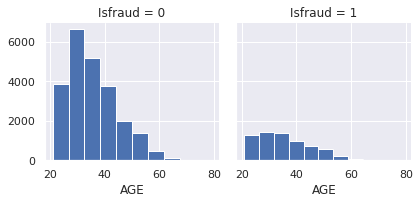

In [ ]:
g = sns.FacetGrid(df, col = 'Isfraud')
g.map(plt.hist, 'AGE')

This throws me off. There are clients that paid more there were asked to, had even a negative bill in Sept., and still have a month of delay, and even defaulted the next month. I am incline of not considering the variables PAY_n for my models because I can't give sense to them (even though it seems they can play a big role). I can transform them into a binary variable (late/notlate) because that is something I can understand.

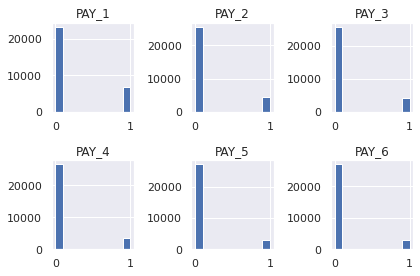

In [ ]:
df.loc[df.PAY_1 > 0, 'PAY_1'] = 1
df.loc[df.PAY_2 > 0, 'PAY_2'] = 1
df.loc[df.PAY_3 > 0, 'PAY_3'] = 1
df.loc[df.PAY_4 > 0, 'PAY_4'] = 1
df.loc[df.PAY_5 > 0, 'PAY_5'] = 1
df.loc[df.PAY_6 > 0, 'PAY_6'] = 1
late = df[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
plot_histograms(late, late.columns, 2, 3, 10)

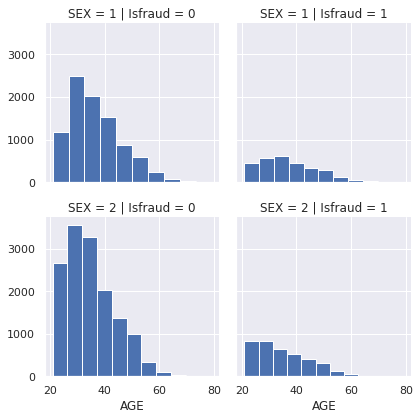

In [ ]:
g = sns.FacetGrid(df, col = 'Isfraud', row = 'SEX')
g.map(plt.hist, 'AGE')

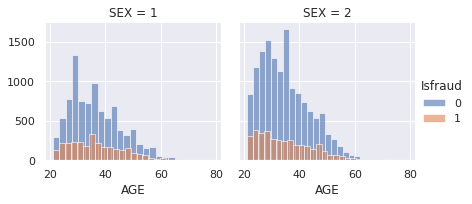

In [ ]:
g = sns.FacetGrid(df, col='SEX', hue='Isfraud')
g.map(plt.hist, 'AGE', alpha=0.6, bins=25) #alpha is for opacity
g.add_legend()

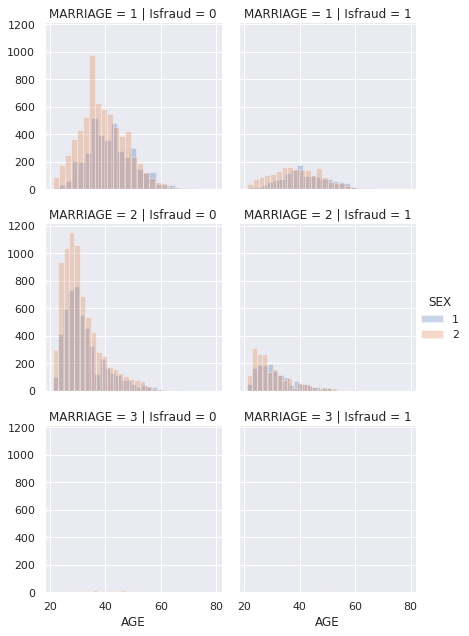

In [ ]:
g = sns.FacetGrid(df, col='Isfraud', row= "MARRIAGE", hue='SEX')
g.map(plt.hist, 'AGE', alpha=0.3, bins=25) 
g.add_legend()

# **Feature Engineering**


In [ ]:
df['SE_MA'] = df.SEX * df.MARRIAGE
corr_2_cols('SE_MA', 'Isfraud')

Isfraud,0,1,perc
SE_MA,,,
1,3844,1346,0.259345
2,11677,3345,0.222673
3,103,42,0.289655
4,7555,1856,0.197216
6,185,47,0.202586


In [ ]:
df['SE_MA_2'] = 0
df.loc[((df.SEX == 1) & (df.MARRIAGE == 1)) , 'SE_MA_2'] = 1 #married man
df.loc[((df.SEX == 1) & (df.MARRIAGE == 2)) , 'SE_MA_2'] = 2 #single man
df.loc[((df.SEX == 1) & (df.MARRIAGE == 3)) , 'SE_MA_2'] = 3 #divorced man
df.loc[((df.SEX == 2) & (df.MARRIAGE == 1)) , 'SE_MA_2'] = 4 #married woman
df.loc[((df.SEX == 2) & (df.MARRIAGE == 2)) , 'SE_MA_2'] = 5 #single woman
df.loc[((df.SEX == 2) & (df.MARRIAGE == 3)) , 'SE_MA_2'] = 6 #divorced woman
corr_2_cols('SE_MA_2', 'Isfraud')

Isfraud,0,1,perc
SE_MA_2,,,
1,3844,1346,0.259345
2,5068,1485,0.226614
3,103,42,0.289655
4,6609,1860,0.219625
5,7555,1856,0.197216
6,185,47,0.202586


In [ ]:
del df['SE_MA']
df = df.rename(columns={'SE_MA_2': 'SE_MA'})

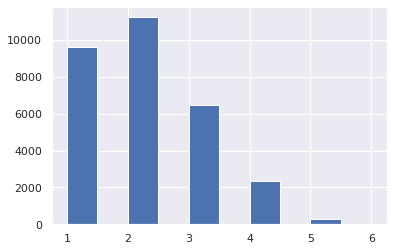

In [ ]:
df['AgeBin'] = 0 #creates a column of 0
df.loc[((df['AGE'] > 20) & (df['AGE'] < 30)) , 'AgeBin'] = 1
df.loc[((df['AGE'] >= 30) & (df['AGE'] < 40)) , 'AgeBin'] = 2
df.loc[((df['AGE'] >= 40) & (df['AGE'] < 50)) , 'AgeBin'] = 3
df.loc[((df['AGE'] >= 50) & (df['AGE'] < 60)) , 'AgeBin'] = 4
df.loc[((df['AGE'] >= 60) & (df['AGE'] < 70)) , 'AgeBin'] = 5
df.loc[((df['AGE'] >= 70) & (df['AGE'] < 81)) , 'AgeBin'] = 6
df.AgeBin.hist()

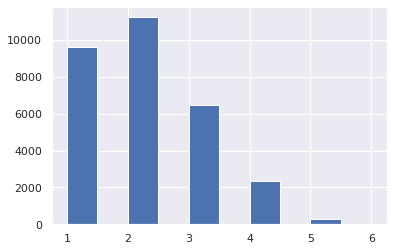

In [ ]:
bins = [20, 29, 39, 49, 59, 69, 81]
bins_names = [1, 2, 3, 4, 5, 6]
df['AgeBin2'] = pd.cut(df['AGE'], bins, labels=bins_names)
df.AgeBin2.hist()

In [ ]:
df['AgeBin3'] = pd.cut(df['AGE'], 6)
df.AgeBin3.value_counts()

(20.942, 30.667]    11013
(30.667, 40.333]    10713
(40.333, 50.0]       6005
(50.0, 59.667]       1930
(59.667, 69.333]      314
(69.333, 79.0]         25
Name: AgeBin3, dtype: int64

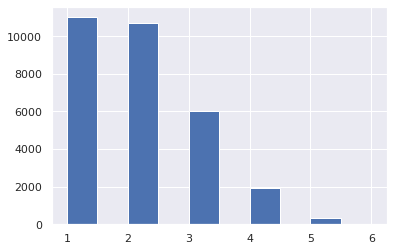

In [ ]:
df['AgeBin3'] = pd.cut(df['AGE'], 6, labels=bins_names) #just added one option
df.AgeBin3.hist()

In [ ]:
df['AgeBin4'] = pd.qcut(df['AGE'], 6)
df.AgeBin4.value_counts()

(26.0, 30.0]      5886
(34.0, 39.0]      5160
(20.999, 26.0]    5127
(30.0, 34.0]      4683
(45.0, 79.0]      4669
(39.0, 45.0]      4475
Name: AgeBin4, dtype: int64

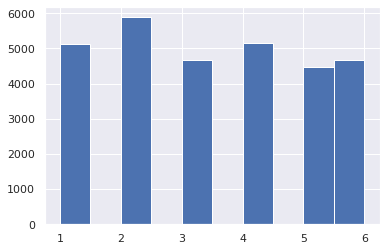

In [ ]:
df['AgeBin4'] = pd.qcut(df['AGE'], 6, labels=bins_names)
df.AgeBin4.hist()

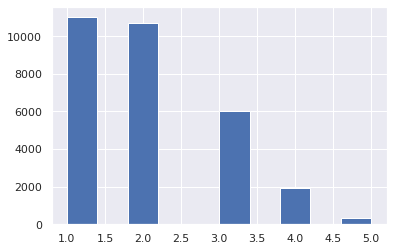

In [ ]:
del df['AgeBin2']
del df['AgeBin3']
del df['AgeBin4'] 
df['AgeBin'] = pd.cut(df['AGE'], 6, labels = [1,2,3,4,5,6])

df['AgeBin'] = pd.to_numeric(df['AgeBin'])
df.loc[(df['AgeBin'] == 6) , 'AgeBin'] = 5
df.AgeBin.hist()

In [ ]:
corr_2_cols('AgeBin', 'Isfraud')

Isfraud,0,1,perc
AgeBin,,,
1,8542,2471,0.224371
2,8524,2189,0.204331
3,4606,1399,0.232973
4,1449,481,0.249223
5,243,96,0.283186


In [ ]:
corr_2_cols('AgeBin', 'SEX')

SEX,1,2,perc
AgeBin,,,
1,3842,7171,0.651140
2,4363,6350,0.592738
3,2587,3418,0.569192
4,917,1013,0.524870
5,179,160,0.471976


In [ ]:
df['SE_AG'] = 0
df.loc[((df.SEX == 1) & (df.AgeBin == 1)) , 'SE_AG'] = 1
df.loc[((df.SEX == 1) & (df.AgeBin == 2)) , 'SE_AG'] = 2
df.loc[((df.SEX == 1) & (df.AgeBin == 3)) , 'SE_AG'] = 3
df.loc[((df.SEX == 1) & (df.AgeBin == 4)) , 'SE_AG'] = 4 
df.loc[((df.SEX == 1) & (df.AgeBin == 5)) , 'SE_AG'] = 5 
df.loc[((df.SEX == 2) & (df.AgeBin == 1)) , 'SE_AG'] = 6 
df.loc[((df.SEX == 2) & (df.AgeBin == 2)) , 'SE_AG'] = 7 
df.loc[((df.SEX == 2) & (df.AgeBin == 3)) , 'SE_AG'] = 8
df.loc[((df.SEX == 2) & (df.AgeBin == 4)) , 'SE_AG'] = 9
df.loc[((df.SEX == 2) & (df.AgeBin == 5)) , 'SE_AG'] = 10
corr_2_cols('SE_AG', 'Isfraud')

Isfraud,0,1,perc
SE_AG,,,
1,2929,913,0.237637
2,3350,1013,0.232180
3,1939,648,0.250483
4,666,251,0.273719
5,131,48,0.268156
6,5613,1558,0.217264
7,5174,1176,0.185197
8,2667,751,0.219719
9,783,230,0.227048


In [ ]:
df['Client_6'] = 1
df['Client_5'] = 1
df['Client_4'] = 1
df['Client_3'] = 1
df['Client_2'] = 1
df['Client_1'] = 1
df.loc[((df.PAY_6 == 0) & (df.BILL_AMT6 == 0) & (df.PAY_AMT6 == 0)) , 'Client_6'] = 0
df.loc[((df.PAY_5 == 0) & (df.BILL_AMT5 == 0) & (df.PAY_AMT5 == 0)) , 'Client_5'] = 0
df.loc[((df.PAY_4 == 0) & (df.BILL_AMT4 == 0) & (df.PAY_AMT4 == 0)) , 'Client_4'] = 0
df.loc[((df.PAY_3 == 0) & (df.BILL_AMT3 == 0) & (df.PAY_AMT3 == 0)) , 'Client_3'] = 0
df.loc[((df.PAY_2 == 0) & (df.BILL_AMT2 == 0) & (df.PAY_AMT2 == 0)) , 'Client_2'] = 0
df.loc[((df.PAY_1 == 0) & (df.BILL_AMT1 == 0) & (df.PAY_AMT1 == 0)) , 'Client_1'] = 0
pd.Series([df[df.Client_6 == 1].Isfraud.count(),
          df[df.Client_5 == 1].Isfraud.count(),
          df[df.Client_4 == 1].Isfraud.count(),
          df[df.Client_3 == 1].Isfraud.count(),
          df[df.Client_2 == 1].Isfraud.count(),
          df[df.Client_1 == 1].Isfraud.count()], [6,5,4,3,2,1])

6    26700
5    27247
4    27572
3    27810
2    28183
1    29477
dtype: int64

In [ ]:
df['Avg_exp_5'] = ((df['BILL_AMT5'] - (df['BILL_AMT6'] - df['PAY_AMT5']))) / df['LIMIT_BAL']
df['Avg_exp_4'] = (((df['BILL_AMT5'] - (df['BILL_AMT6'] - df['PAY_AMT5'])) +
                 (df['BILL_AMT4'] - (df['BILL_AMT5'] - df['PAY_AMT4']))) / 2) / df['LIMIT_BAL']
df['Avg_exp_3'] = (((df['BILL_AMT5'] - (df['BILL_AMT6'] - df['PAY_AMT5'])) +
                 (df['BILL_AMT4'] - (df['BILL_AMT5'] - df['PAY_AMT4'])) +
                 (df['BILL_AMT3'] - (df['BILL_AMT4'] - df['PAY_AMT3']))) / 3) / df['LIMIT_BAL']
df['Avg_exp_2'] = (((df['BILL_AMT5'] - (df['BILL_AMT6'] - df['PAY_AMT5'])) +
                 (df['BILL_AMT4'] - (df['BILL_AMT5'] - df['PAY_AMT4'])) +
                 (df['BILL_AMT3'] - (df['BILL_AMT4'] - df['PAY_AMT3'])) +
                 (df['BILL_AMT2'] - (df['BILL_AMT3'] - df['PAY_AMT2']))) / 4) / df['LIMIT_BAL']
df['Avg_exp_1'] = (((df['BILL_AMT5'] - (df['BILL_AMT6'] - df['PAY_AMT5'])) +
                 (df['BILL_AMT4'] - (df['BILL_AMT5'] - df['PAY_AMT4'])) +
                 (df['BILL_AMT3'] - (df['BILL_AMT4'] - df['PAY_AMT3'])) +
                 (df['BILL_AMT2'] - (df['BILL_AMT3'] - df['PAY_AMT2'])) +
                 (df['BILL_AMT1'] - (df['BILL_AMT2'] - df['PAY_AMT1']))) / 5) / df['LIMIT_BAL']
df[['LIMIT_BAL', 'Avg_exp_5', 'BILL_AMT5', 'Avg_exp_4', 'BILL_AMT4','Avg_exp_3', 'BILL_AMT3',
    'Avg_exp_2', 'BILL_AMT2', 'Avg_exp_1', 'BILL_AMT1', 'Isfraud']].sample(20)

,LIMIT_BAL,Avg_exp_5,BILL_AMT5,Avg_exp_4,BILL_AMT4,Avg_exp_3,BILL_AMT3,Avg_exp_2,BILL_AMT2,Avg_exp_1,BILL_AMT1,Isfraud
12363,130000,0.109069,28865,0.065277,2793,0.139774,37528,0.157481,27347,0.160525,48764,0
27831,500000,0.000740,22440,0.000727,21986,0.000708,19321,0.000829,18581,0.000895,16162,0
12119,20000,0.137050,11927,0.070075,11395,0.047683,11164,0.042612,11712,0.038840,11087,0
10145,400000,0.004893,7879,0.034845,30789,0.023668,29186,0.017954,-490,0.014526,-166,0
27187,240000,0.007500,1793,0.025833,10591,0.019206,1425,0.028867,13842,0.033379,22334,0
22008,230000,0.017778,70329,0.019789,72983,0.049129,95155,0.061053,112425,0.051750,111295,0
2740,70000,0.002957,13780,0.031679,17008,0.083890,28978,0.122354,44348,0.102537,44230,0
1286,230000,0.066717,28279,0.053637,24607,0.096523,51535,0.077146,44908,0.081781,64982,0
18149,310000,0.017532,222139,0.028210,234185,0.028103,225003,0.091084,301861,0.078407,310392,0
1510,200000,0.066340,168199,0.041955,165713,0.044882,169860,0.052090,178491,0.055757,184676,0


In [ ]:
df['Closeness_6'] = (df.LIMIT_BAL - df.BILL_AMT6) / df.LIMIT_BAL
df['Closeness_5'] = (df.LIMIT_BAL - df.BILL_AMT5) / df.LIMIT_BAL
df['Closeness_4'] = (df.LIMIT_BAL - df.BILL_AMT4) / df.LIMIT_BAL
df['Closeness_3'] = (df.LIMIT_BAL - df.BILL_AMT3) / df.LIMIT_BAL
df['Closeness_2'] = (df.LIMIT_BAL - df.BILL_AMT2) / df.LIMIT_BAL
df['Closeness_1'] = (df.LIMIT_BAL - df.BILL_AMT1) / df.LIMIT_BAL
df[['Closeness_6', 'Closeness_5', 'Closeness_4', 'Closeness_3', 'Closeness_2',
   'Closeness_1', 'Isfraud']].sample(20)

,Closeness_6,Closeness_5,Closeness_4,Closeness_3,Closeness_2,Closeness_1,Isfraud
5949,0.488312,0.496900,0.502337,0.364287,0.244438,0.128000,1
21624,0.303650,0.382450,0.862600,0.848850,0.383900,0.513050,0
28562,0.989071,0.753333,0.797376,0.839724,0.997376,0.976233,0
5036,0.998859,0.995972,0.977934,0.973644,0.968631,0.998850,0
19044,0.965957,0.990814,1.000039,1.000039,1.000039,1.000039,0
16308,0.120582,0.996545,0.614727,0.625091,0.641436,0.672045,0
5130,0.999819,0.991112,1.000535,0.990188,1.000000,0.986469,0
19846,0.255670,0.264245,0.116315,-0.013870,0.019435,0.035895,0
2813,1.000000,0.998000,0.332780,0.360160,0.277760,0.050380,0
17498,-0.108400,0.001500,0.036100,0.039200,0.008800,0.229200,0


# **Finding my Balance**

In [ ]:
#Finding my balance and learn my machine 

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split


In [ ]:
y = df['Isfraud'].copy()
y.sample(5)

20616    0
15612    0
10962    1
10588    0
13583    0
Name: Isfraud, dtype: int64

In [ ]:
# create the features, which now will be everything in the original df
features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
X = df[features].copy()
X.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [ ]:
# split the df into train and test, it is important these two do not communicate during the training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
# this means we will train on 80% of the data and test on the remaining 20%.

In [ ]:
#check that the target is not far off
print(df.Isfraud.describe())
print("---------------------------")
print(y_train.describe())
print("---------------------------")
print(y_test.describe())

count    30000.000000
mean         0.221200
std          0.415062
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Isfraud, dtype: float64
---------------------------
count    24000.000000
mean         0.221792
std          0.415460
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Isfraud, dtype: float64
---------------------------
count    6000.000000
mean        0.218833
std         0.413490
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Isfraud, dtype: float64


In [ ]:
#create the classifier
classifier = DecisionTreeClassifier(max_depth=10, random_state=14) 
# training the classifier
classifier.fit(X_train, y_train)
# do our predictions on the test
predictions = classifier.predict(X_test)
# see how good we did on the test
accuracy_score(y_true = y_test, y_pred = predictions)

0.7981666666666667

In [ ]:
classifier = DecisionTreeClassifier(max_depth=100, random_state=14) 
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
accuracy_score(y_true = y_test, y_pred = predictions)

0.721

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# define the parameters grid
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split': [2, 5, 10, 20]}

# create the grid
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5, scoring= 'accuracy')
# the cv option will be clear in a few cells

#training
grid_tree.fit(X_train, y_train)
#let's see the best estimator
print(grid_tree.best_estimator_)
#with its score
print(np.abs(grid_tree.best_score_))

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=20)
0.8114166666666668


In [ ]:
from sklearn.model_selection import KFold

In [ ]:
features = ['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'PAY_1','PAY_2', 'PAY_3', 
            'PAY_4', 'PAY_5', 'PAY_6','BILL_AMT1', 'BILL_AMT2',
            'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
            'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 
            'SE_MA', 'AgeBin', 'SE_AG', 'Avg_exp_5', 'Avg_exp_4',
            'Avg_exp_3', 'Avg_exp_2', 'Avg_exp_1', 'Closeness_5',
            'Closeness_4', 'Closeness_3', 'Closeness_2','Closeness_1']
y = df['Isfraud'].copy() # target
X = df[features].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
# create the training df by remerging X_train and y_train
df_train = X_train.join(y_train)
df_train.sample(10)

,LIMIT_BAL,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SE_MA,AgeBin,SE_AG,Avg_exp_5,Avg_exp_4,Avg_exp_3,Avg_exp_2,Avg_exp_1,Closeness_5,Closeness_4,Closeness_3,Closeness_2,Closeness_1,Isfraud
15828,340000,1,2,0,0,0,0,0,0,4617,13054,15449,9610,4173,12929,13054,15449,9610,4373,12929,8000,5,1,6,0.012274,0.020563,0.028855,0.031240,0.027708,0.987726,0.971735,0.954562,0.961606,0.986421,0
17101,30000,2,1,1,1,0,0,0,0,29304,28534,29906,30524,28915,29524,0,1831,1449,1100,1051,1281,4,1,6,0.014733,0.052517,0.044244,0.037008,0.034740,0.036167,-0.017467,0.003133,0.048867,0.023200,1
10734,450000,2,1,0,0,0,0,0,0,19951,7277,1096,1968,1575,3889,8203,1105,2012,2007,4019,510,1,3,3,0.003789,0.004561,0.003885,0.006962,0.014848,0.996500,0.995627,0.997564,0.983829,0.955664,0
22532,340000,2,1,0,0,0,0,0,0,284099,286067,290374,5329,5029,7079,11000,10005,5336,5036,38592,4448,4,3,8,0.107476,0.061585,0.325744,0.248498,0.204111,0.985209,0.984326,0.145959,0.158626,0.164415,0
13236,70000,1,2,0,0,0,0,0,0,8878,10077,11203,11320,11487,11895,1500,1600,600,500,600,2600,5,1,6,0.002743,0.003750,0.004800,0.005293,0.005094,0.835900,0.838286,0.839957,0.856043,0.873171,0
24260,230000,2,2,0,0,0,0,0,0,171861,157389,161622,162501,163329,161560,10000,10000,8000,10000,7000,7000,2,1,1,0.038126,0.039002,0.036322,0.033510,0.048088,0.289874,0.293474,0.297296,0.315700,0.252778,0
16510,40000,1,2,0,0,0,0,0,0,37412,38485,39575,39247,9687,33625,2000,20000,1359,600,33625,615,2,1,1,0.242175,0.498088,0.346117,0.377775,0.306855,0.757825,0.018825,0.010625,0.037875,0.064700,0
15385,90000,2,1,0,1,0,0,0,0,336,168,432,0,0,0,0,432,0,0,0,0,4,2,7,0.000000,0.000000,0.001600,0.001667,0.001707,1.000000,1.000000,0.995200,0.998133,0.996267,1
19631,170000,1,1,0,0,0,0,0,0,93095,95044,98505,99970,102303,104654,3500,5000,4000,4000,4000,4000,4,3,8,0.009700,0.009753,0.011473,0.010868,0.010519,0.398218,0.411941,0.420559,0.440918,0.452382,0
5116,30000,2,2,1,1,1,0,0,0,20501,25151,24453,24849,25399,27020,5000,0,1100,1100,2200,1200,2,1,1,0.019300,0.018817,0.020367,0.021092,0.019207,0.153367,0.171700,0.184900,0.161633,0.316633,0


In [ ]:
from sklearn.utils import resample

In [ ]:
# Separate majority and minority classes
df_majority = df_train[df_train.Isfraud==0]
df_minority = df_train[df_train.Isfraud==1]

print(df_majority.Isfraud.count())
print("-----------")
print(df_minority.Isfraud.count())
print("-----------")
print(df_train.Isfraud.value_counts())

18677
-----------
5323
-----------
0    18677
1     5323
Name: Isfraud, dtype: int64


In [ ]:
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=18677,    # to match majority class
                                 random_state=587) # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
# Display new class counts
df_upsampled.Isfraud.value_counts()

0    18677
1    18677
Name: Isfraud, dtype: int64

In [ ]:
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=5323,     # to match minority class
                                 random_state=587) # reproducible results
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
# Display new class counts
df_downsampled.Isfraud.value_counts()

0    5323
1    5323
Name: Isfraud, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_SMOTE, y_SMOTE = sm.fit_resample(X_train, y_train)
print(len(y_SMOTE))
print(y_SMOTE.sum())


37354
18677


# **Algorithm Selection**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import f1_score


In [ ]:
clf_list = [DecisionTreeClassifier(max_depth = 3, class_weight = "balanced"), 
            RandomForestClassifier(n_estimators = 100, class_weight = "balanced"), 
            
           ]

In [ ]:
# use Kfold to evaluate the normal training set
kf = KFold(n_splits=5,random_state=42,shuffle=True)

mdl = []
fold = []
scr = []

for i,(train_index, test_index) in enumerate(kf.split(df_train)):
    training = df.iloc[train_index,:]
    valid = df.iloc[test_index,:]
    print(i)
    for clf in clf_list:
        model = clf.__class__.__name__
        feats = training[features] #defined above
        label = training['Isfraud']
        valid_feats = valid[features]
        valid_label = valid['Isfraud']
        clf.fit(feats,label) 
        pred = clf.predict(valid_feats)
        score = f1_score(y_true = valid_label, y_pred = pred)
        fold.append(i+1)
        scr.append(score)
        mdl.append(model)
        print(model)

 


0
DecisionTreeClassifier
RandomForestClassifier
1
DecisionTreeClassifier
RandomForestClassifier
2
DecisionTreeClassifier
RandomForestClassifier
3
DecisionTreeClassifier
RandomForestClassifier
4
DecisionTreeClassifier
RandomForestClassifier


In [ ]:
from plotnine import *

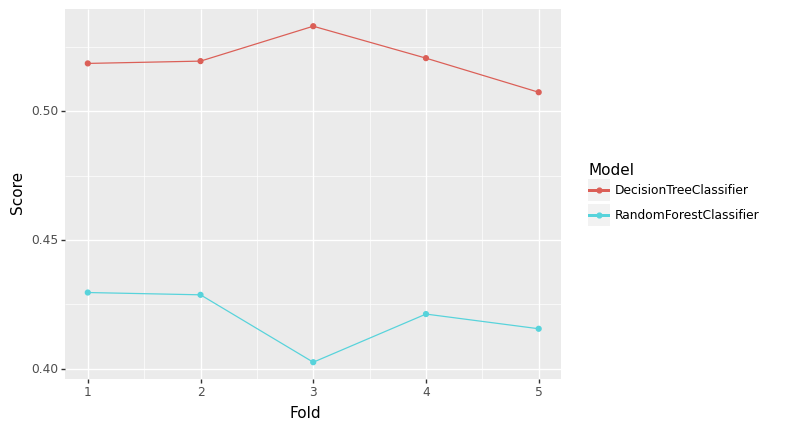

In [ ]:
 #create a small df with the scores
performance = pd.DataFrame({'Model': mdl, 'Score':scr,'Fold':fold})
g_normal = ggplot(performance,aes(x='Fold',y='Score',group = 'Model',color = 'Model')) + geom_point() + geom_line()
print(g_normal)
        

In [ ]:
clf_list = [DecisionTreeClassifier(max_depth = 3), 
            RandomForestClassifier(n_estimators = 100), 
            
           ]
# the parameters are set in order to have the same kind of tree every time

0
DecisionTreeClassifier
RandomForestClassifier
1
DecisionTreeClassifier
RandomForestClassifier
2
DecisionTreeClassifier
RandomForestClassifier
3
DecisionTreeClassifier
RandomForestClassifier
4
DecisionTreeClassifier
RandomForestClassifier


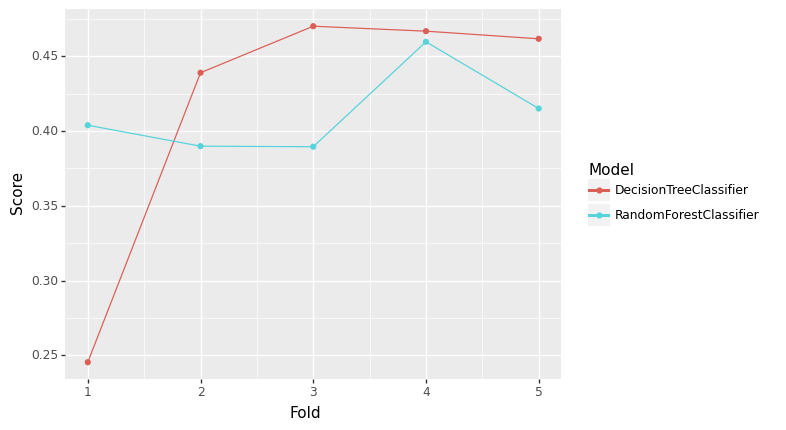

In [ ]:
kf = KFold(n_splits=5,random_state=42,shuffle=True)

mdl = []
fold = []
scr = []

for i,(train_index, test_index) in enumerate(kf.split(df_downsampled)):
    training = df.iloc[train_index,:]
    valid = df.iloc[test_index,:]
    print(i)
    for clf in clf_list:
        model = clf.__class__.__name__
        feats = training[features] #defined above
        label = training['Isfraud']
        valid_feats = valid[features]
        valid_label = valid['Isfraud']
        clf.fit(feats,label) 
        pred = clf.predict(valid_feats)
        score = f1_score(y_true = valid_label, y_pred = pred)
        fold.append(i+1)
        scr.append(score)
        mdl.append(model)
        print(model)
performance = pd.DataFrame({'Model': mdl, 'Score':scr,'Fold':fold})
g_downsampled = ggplot(performance,aes(x='Fold',y='Score',group = 'Model',color = 'Model')) + geom_point() + geom_line()
print(g_downsampled)
        

In [ ]:
param_grid = {'n_estimators': [200, 400, 600, 1000], 
              'criterion': ['entropy', 'gini'],
              'class_weight' : ['balanced'], 'n_jobs' : [-1]}
accuracy_scorer = make_scorer(f1_score)
grid_forest = GridSearchCV(RandomForestClassifier(), param_grid, scoring = accuracy_scorer, cv=5)
%time grid_forest = grid_forest.fit(X_train, y_train)
print(grid_forest.best_estimator_)
print(grid_forest.best_score_)
forest_normal = grid_forest.best_estimator_

CPU times: user 3min 46s, sys: 15 s, total: 4min 1s
Wall time: 32min
RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       n_estimators=400, n_jobs=-1)
0.4486486887550563


In [ ]:
forest_normal = RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=400, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)
print(0.449643478486)

0.449643478486


In [ ]:
y_upsampled = df_upsampled.Isfraud
X_upsampled = df_upsampled.drop(['Isfraud'], axis= 1)

In [ ]:
param_grid = {'n_estimators': [200, 400, 600, 1000],
              'criterion': ['entropy', 'gini'], 'n_jobs' : [-1]}
acc_scorer = make_scorer(f1_score)
grid_forest = GridSearchCV(RandomForestClassifier(), param_grid, scoring = acc_scorer, cv=5)
%time grid_forest = grid_forest.fit(X_upsampled, y_upsampled)
print(grid_forest.best_estimator_)
print(grid_forest.best_score_)
forest_upsampled = grid_forest.best_estimator_

CPU times: user 4min 43s, sys: 16.8 s, total: 5min
Wall time: 42min 34s
RandomForestClassifier(n_estimators=600, n_jobs=-1)
0.9332697776873428


In [ ]:
forest_upsampled = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, 
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
print(0.93295704261)

In [ ]:
# SMOTE training set
param_grid = {'n_estimators': [200, 400, 600, 1000],
              'criterion': ['entropy', 'gini'], 'n_jobs' : [-1]}
acc_scorer = make_scorer(f1_score)
grid_forest = GridSearchCV(RandomForestClassifier(), param_grid, scoring = acc_scorer, cv=5)
%time grid_forest = grid_forest.fit(X_SMOTE, y_SMOTE)
print(grid_forest.best_estimator_)
print(grid_forest.best_score_)
forest_SMOTE = grid_forest.best_estimator_

CPU times: user 6min 25s, sys: 22.3 s, total: 6min 47s
Wall time: 47min 25s
RandomForestClassifier(n_estimators=1000, n_jobs=-1)
0.8373114405783554


In [ ]:
forest_SMOTE = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, 
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
print(0.831423121548)

0.831423121548


### **Training and Testing**

In [ ]:
%time forest_normal.fit(X_train, y_train)
predictions = forest_normal.predict(X_test)
print("-------------")
print("f1 score: {}".format(round(f1_score(y_true = y_test, y_pred = predictions),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = predictions),3)))
print("-------------")
print((forest_normal, features))
print("-------------")
TP = np.sum(np.logical_and(predictions == 1, y_test == 1))
TN = np.sum(np.logical_and(predictions == 0, y_test == 0))
FP = np.sum(np.logical_and(predictions == 1, y_test == 0))
FN = np.sum(np.logical_and(predictions == 0, y_test == 1))
pred = len(predictions)
print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),2)))
print('Recall: {}'.format(round(TP/(TP+FN),2)))
print('Problematic ratio: {}'.format(round(FN/(FN+TP),2)))

CPU times: user 1min 39s, sys: 302 ms, total: 1min 39s
Wall time: 55.3 s
-------------
f1 score: 0.452
Accuracy: 0.81
-------------
(RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       n_estimators=400, n_jobs=-1), ['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SE_MA', 'AgeBin', 'SE_AG', 'Avg_exp_5', 'Avg_exp_4', 'Avg_exp_3', 'Avg_exp_2', 'Avg_exp_1', 'Closeness_5', 'Closeness_4', 'Closeness_3', 'Closeness_2', 'Closeness_1'])
-------------
True Positives: 468
False Positive: 292
True Negative: 4395
False Negative: 845
Precision: 0.62
Recall: 0.36
Problematic ratio: 0.64


In [ ]:
# Upsample training
%time forest_upsampled.fit(X_upsampled, y_upsampled)
predictions = forest_upsampled.predict(X_test)
print("-------------")
print("f1 score: {}".format(round(f1_score(y_true = y_test, y_pred = predictions),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = predictions),3)))
print("-------------")
print((forest_upsampled, features))
print("-------------")
TP = np.sum(np.logical_and(predictions == 1, y_test == 1))
TN = np.sum(np.logical_and(predictions == 0, y_test == 0))
FP = np.sum(np.logical_and(predictions == 1, y_test == 0))
FN = np.sum(np.logical_and(predictions == 0, y_test == 1))
pred = len(predictions)

print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),2)))
print('Recall: {}'.format(round(TP/(TP+FN),2)))
print('Problematic ratio: {}'.format(round(FN/(FN+TP),2)))

CPU times: user 2min, sys: 322 ms, total: 2min
Wall time: 1min 2s
-------------
f1 score: 0.487
Accuracy: 0.804
-------------
(RandomForestClassifier(n_estimators=600, n_jobs=-1), ['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SE_MA', 'AgeBin', 'SE_AG', 'Avg_exp_5', 'Avg_exp_4', 'Avg_exp_3', 'Avg_exp_2', 'Avg_exp_1', 'Closeness_5', 'Closeness_4', 'Closeness_3', 'Closeness_2', 'Closeness_1'])
-------------
True Positives: 559
False Positive: 422
True Negative: 4265
False Negative: 754
Precision: 0.57
Recall: 0.43
Problematic ratio: 0.57


In [ ]:
# SMOTE training
%time forest_SMOTE.fit(X_SMOTE, y_SMOTE)
predictions = forest_SMOTE.predict(X_test)
print("-------------")
print("f1 score: {}".format(round(f1_score(y_true = y_test, y_pred = predictions),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = predictions),3)))
print("-------------")
print((forest_SMOTE, features))
print("-------------")
TP = np.sum(np.logical_and(predictions == 1, y_test == 1))
TN = np.sum(np.logical_and(predictions == 0, y_test == 0))
FP = np.sum(np.logical_and(predictions == 1, y_test == 0))
FN = np.sum(np.logical_and(predictions == 0, y_test == 1))
pred = len(predictions)
print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),2)))
print('Recall: {}'.format(round(TP/(TP+FN),2)))
print('Problematic ratio: {}'.format(round(FN/(FN+TP),2)))

CPU times: user 2min 7s, sys: 1.48 s, total: 2min 9s
Wall time: 1min 6s
-------------
f1 score: 0.494
Accuracy: 0.777
-------------
(RandomForestClassifier(n_estimators=600, n_jobs=-1), ['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SE_MA', 'AgeBin', 'SE_AG', 'Avg_exp_5', 'Avg_exp_4', 'Avg_exp_3', 'Avg_exp_2', 'Avg_exp_1', 'Closeness_5', 'Closeness_4', 'Closeness_3', 'Closeness_2', 'Closeness_1'])
-------------
True Positives: 654
False Positive: 681
True Negative: 4006
False Negative: 659
Precision: 0.49
Recall: 0.5
Problematic ratio: 0.5
